<a href="https://colab.research.google.com/github/Pathin220/4105_Hw3/blob/main/4105_Hw_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [664]:
import torch
import tensorflow
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split

In [665]:
#1. In our temperature prediction example, let’s change our model to a nonlinear system. Consider the following description for our model:

#w2 * t_u ** 2 + w1 * t_u + b.

#1.a Modify the training loop properly to accommodate this redefinition.

#1.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings).
#Report your loss for every 500 epochs per training.

#1.c Pick the best non-linear model and compare your final best loss against the linear model that we did during the lecture.
#For this, visualize the non-linear model against the linear model over the input dataset, as we did during the lecture. Is the actual result better or worse than our baseline linear model?

In [666]:
#setting values in array for X which is t_C and Y which is t_U
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = 0.01 * t_u
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

In [667]:
#defining the nonlinear model
def nonlin_model(t_u, w1, w2, b):
    return w2 * t_u**2 + w1 * t_u + b

In [668]:
#defining the linear model
def lin_model(t_u, w, b):
    return w * t_u + b

In [669]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [670]:
def loss_func(tp, tc):
  dsqdiffs = 2 * (tp - tc) / tp.size(0)
  return dsqdiffs

In [671]:
def model_w1(tu, w1, w2, b):
  return tu

In [672]:
def model_w2(tu, w1, w2, b):
  return tu**2

In [673]:
def model_b(tu, w1, w2, b):
  return 1.0

In [674]:
def gradfunc(tu, tc, tp, w1, w2, b):
  loss_t_p = loss_func(tp, tc)
  dlossd_w1 = loss_t_p * model_w1(tu, w1, w2, b)
  dlossd_w2 = loss_t_p * model_w2(tu, w1, w2, b)
  dlossd_b = loss_t_p * model_b(tu, w1 , w2, b)
  return torch.stack([dlossd_w1.sum(), dlossd_w2.sum(), dlossd_b.sum()])

In [675]:
w2 = torch.ones(())
w1 = torch.ones(())
b = torch.zeros(())

t_p = nonlin_model(t_u, w2, w1, b)
t_p

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [676]:
#computing the loss
loss = loss_fn(t_p, t_c)
loss


tensor(11709471.)

In [692]:
#testing function
loss_test = loss_fn(nonlin_model(t_un, *params), t_c)
loss_test.backward()

params.grad

tensor([-12.6975,  -8.4735, -19.3758])

In [695]:
SGD_learning_rate = 0.1
SGD_optimizer = optim.SGD([params], lr=SGD_learning_rate)

SGD_t_p = nonlin_model(t_un, *params)
SGD_loss = loss_fn(SGD_t_p, t_c)

SGD_optimizer.zero_grad()
SGD_loss.backward()
SGD_optimizer.step()

In [677]:
# Non-linear training loop
def nonlin_training_loop (n_epochs, params, t_u, t_c, optimizer):
    for epoch in range(1, n_epochs + 1):
        w1, w2, b = params
        t_p = nonlin_model(t_u, w1, w2, b)
        loss = loss_fn(t_p, t_c)
        grad = gradfunc(t_u, t_c, t_p, w1, w2, b)





        if epoch % 500 == 0:
            print ('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params, loss

In [678]:
#setting learning rate to 0.1
nonlin_training_loop(
    n_epochs = 5000,
    learning_rate = 0.1,
    params = torch.tensor([1, 1, 0]),
    t_u = t_un,
    t_c = t_c
)


Epoch 500, Loss 2.108454
Epoch 1000, Loss 2.090726
Epoch 1500, Loss 2.090720
Epoch 2000, Loss 2.090720
Epoch 2500, Loss 2.090719
Epoch 3000, Loss 2.090720
Epoch 3500, Loss 2.090720
Epoch 4000, Loss 2.090720
Epoch 4500, Loss 2.090719
Epoch 5000, Loss 2.090719


(tensor([ 24.7210,  28.3420, -10.6403]), tensor(2.0907))

In [679]:
#setting learning rate to 0.01
nonlin_training_loop(
    n_epochs = 5000,
    learning_rate = 0.01,
    params = torch.tensor([1, 1, 0]),
    t_u = t_un,
    t_c = t_c
)

Epoch 500, Loss 26.266180
Epoch 1000, Loss 12.949670
Epoch 1500, Loss 6.968260
Epoch 2000, Loss 4.281574
Epoch 2500, Loss 3.074787
Epoch 3000, Loss 2.532740
Epoch 3500, Loss 2.289262
Epoch 4000, Loss 2.179901
Epoch 4500, Loss 2.130778
Epoch 5000, Loss 2.108713


(tensor([ 24.3412,  27.9050, -10.3017]), tensor(2.1087))

In [680]:
#setting learning rate to 0.001
nonlin_training_loop(
    n_epochs = 5000,
    learning_rate = 0.001,
    params = torch.tensor([1, 1, 0]),
    t_u = t_un,
    t_c = t_c
)

Epoch 500, Loss 58.822189
Epoch 1000, Loss 48.348244
Epoch 1500, Loss 44.396778
Epoch 2000, Loss 41.118404
Epoch 2500, Loss 38.115955
Epoch 3000, Loss 35.345898
Epoch 3500, Loss 32.788918
Epoch 4000, Loss 30.428556
Epoch 4500, Loss 28.249678
Epoch 5000, Loss 26.238335


(tensor([11.5393, 11.6079,  1.5983]), tensor(26.2383))

In [681]:
#setting learning rate to 0.0001
nonlin_training_loop(
    n_epochs = 5000,
    learning_rate = 0.0001,
    params = torch.tensor([1, 1, 0]),
    t_u = t_un,
    t_c = t_c
)

Epoch 500, Loss 138.825058
Epoch 1000, Loss 118.428955
Epoch 1500, Loss 102.817139
Epoch 2000, Loss 90.845161
Epoch 2500, Loss 81.642403
Epoch 3000, Loss 74.546761
Epoch 3500, Loss 69.054512
Epoch 4000, Loss 64.782639
Epoch 4500, Loss 61.439713
Epoch 5000, Loss 58.804115


(tensor([4.8014, 3.7440, 4.9612]), tensor(58.8041))

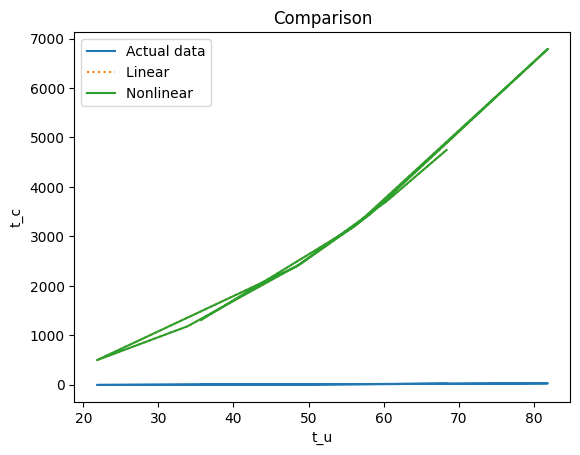

In [682]:
# Plotting data
plt.plot(t_u.numpy(), t_c.numpy(), label='Actual data')
plt.plot(t_u.numpy(), t_p.numpy(), label='Linear ', linestyle='dotted')
plt.plot(t_u.numpy(), t_p.numpy(), label='Nonlinear ', linestyle='solid')

plt.legend()
plt.xlabel('t_u')
plt.ylabel('t_c')
plt.title('Comparison')
plt.show()



In [684]:
#2.a. Develop preprocessing and a training loop to train a linear regression model that predicts housing price based on the following input variables:
#area, bedrooms, bathrooms, stories, parking

#For this, you need to use the housing dataset. For training and validation, use 80% (training) and 20% (validation) split.
# Identify the best parameters for your linear regression model based on the above input variables. In this case, you will have six parameters:

#2.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings).
# Report your loss and validation accuracy for every 500 epochs per training. Pick the best linear model.

#2.c. Compare your results against the linear regression done in homework 1. Do you see meaningful differences?

In [685]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Machine Learning/Housing.csv'
hd = pd.DataFrame(pd.read_csv(file_path))



Mounted at /content/drive


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Y = hd.pop('price')
X = hd[features].values

In [686]:
#loss calculation
def lossfunc(t_p, price):
    squareddiffs = (t_p - t_c)**2
    return squareddiffs.mean()

In [689]:
def lin_model(t_u, w5, w4, w3, w2, w1, b):
  return torch.matmul(t_u, params[:-1]) + params[-1]

In [690]:
def lin_training(epochs, optimizer, params, train_t_u, valid_t_u, train_t_c, valid_t_c):
  training_losses = []
  validing_losses = []

In [ ]:
#Splitting the Dataset
x2_train, x2_val = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 0)
x2_train.head()